# Using Popup Class

## Import Classes and Connect

In [2]:
import warnings
warnings.filterwarnings("ignore", "Warning")

In [4]:
from arcgis.map import Map
from arcgis.map import popups
from arcgis.gis import GIS

gis = GIS(profile="your_online_profile")

## Popups

### Pop-ups: Property of Web Maps

A [Web map](https://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) or [Web scene](https://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm) can show descriptive information about imagery and features configured to display when you click on the image or feature. A graphic appears as a pop-up, which can bring focus to the attributes associated with each layer in the map. Pop-ups can be minimal and straightforward, but can also be configured to display information in exciting ways through use of auxiliary elements such as attachments, images, charts, text, and they can even link to external web pages.

Popups are associated with individual layers on a Web map or scene. We can intialize a [PopupManager](/python/api-reference/arcgis.map.toc.html#popupmanager) by calling the [`popup`](/popup/api-reference/arcgis.map.toc.html#arcgis.map.map_widget.MapContent.popup) method on the [_MapContent_](/python/api-reference/arcgis.map.toc.html#mapcontent) object and specifying which layer we will edit based on the index position within the map's content.  See [Configure pop-ups](https://doc.arcgis.com/en/arcgis-online/create-maps/configure-pop-ups-mv.htm) and 
[View pop-ups](https://doc.arcgis.com/en/arcgis-online/get-started/view-pop-ups-mv.htm) for detailed information on managing popups in ArcGIS Online.  

Before pop-ups can be managed with the Python API, the layer must be enabled for popups in a Web map. By default, when you add a Feature Layer to a map in the ArcGIS Online Map Viwer, the layer is enabled for pop-ups. Within the Python API, you can inspect the definition of the Web Map item using the [get_data()](/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.get_data) method to return a Python dictionary representation of the web map and check if there is a `popupInfo` configured for the operational layer you want to work with. If not, you can [configure a pop-up with the API](#Configure-Pop-up).

Let's get an existing Web map and observe popup behavior:

<Item title:"World Countries 2022-01-06 16:33pm" type:Web Map owner:arcgis_python>
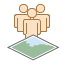

In [39]:
wm_item = gis.content.get("1acd741888ae44188eba04945307b408")
wm_item

In [40]:
op_layers_list = wm_item.get_data()["operationalLayers"]
for layer in op_layers_list:
    if layer.get("popupInfo"):
        print(f"{layer['title']} -> Configured")
    else:
        print(f"{layer['title']} -> No Pop-up")

World_Countries -> Configured


### Editing a Popup Dataclass

Let's initialize a [_Map_](/python/api-reference/arcgis.map.toc.html#map) object from this web map to examine pop-up representation in the Python API. After the map widget appears, enumerate over the content to establish the index position for a layer, and then use the layer [PopupManager](/api-reference/arcgis.map.toc.html#popupmanager) to enable the map widget for pop-ups by setting the [disable_popup](/python/api-reference/arcgis.map.toc.html#arcgis.map.popups.PopupManager.disable_popup) property to `False` (See below). After doing so, click on a feature and the pop-up will appear:


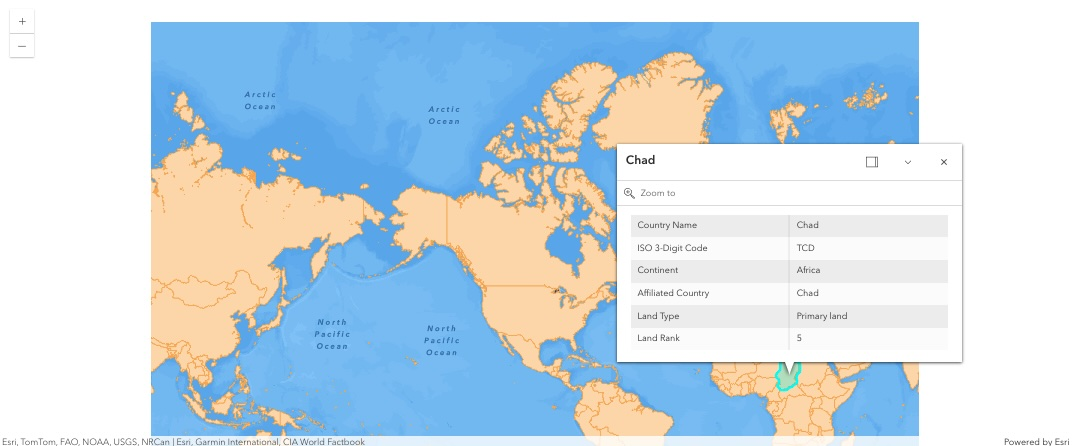

In [6]:
m = Map(
    item=wm_item
)
m

Now let's enumerate the map's content layers so we have the index position and layer information for  all the layers in the map:

In [52]:
for idx,mlyr in enumerate(m.content.layers):
    print(f"{idx:<6}{mlyr}")

0     <FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/World_Countries/FeatureServer/0">


We can use the index position to retrieve the layer's popup manager using the `popup` method on the _MapContent_ object:

In [53]:
lyr_pmgr = m.content.popup(0)
lyr_pmgr

PopupManager for: World_Countries

In [54]:
lyr_pmgr.disable_popup = False

> _Note:_ Click on the map after doing this to click on a feature and view the popup.

From the [PopupManager](/python/api-reference/arcgis.map.toc.html#popupmanager), let's examine the `info` property to view what's returned:

In [55]:
lyr_pinfo = lyr_pmgr.info
lyr_pinfo

PopupInfo(description=None, expression_infos=None, field_infos=[FieldInfo(field_name='FID', format=Format(date_format=None, digit_separator=True, places=0), is_editable=False, label='FID', statistic_type=None, string_field_option='textbox', tooltip='', visible=False), FieldInfo(field_name='COUNTRY', format=None, is_editable=True, label='Country Name', statistic_type=None, string_field_option='textbox', tooltip='', visible=True), FieldInfo(field_name='ISO_CC', format=None, is_editable=True, label='ISO 3-Digit Code', statistic_type=None, string_field_option='textbox', tooltip='', visible=True), FieldInfo(field_name='CONTINENT', format=None, is_editable=True, label='Continent', statistic_type=None, string_field_option='textbox', tooltip='', visible=True), FieldInfo(field_name='COUNTRYAFF', format=None, is_editable=True, label='Affiliated Country', statistic_type=None, string_field_option='textbox', tooltip='', visible=True), FieldInfo(field_name='LAND_TYPE', format=None, is_editable=True,

We get a [PopupInfo](/python//api-reference/arcgis.map.toc.html#popupinfo) object. Information about the current popup is contained within this object. Based upon the look of the popup above, it looks like map author chose the default popup configuration for the layer. Let's examine what information is available from the `PopupInfo` class and can examine properties to inspect the current pop-up

In [56]:
lyr_pinfo.title

'{COUNTRY}'

We can see use the [_field_infos_](/python/api-reference/arcgis.map.toc.html#arcgis.map.popups.PopupInfo.field_infos) property to see how the fields are configured:

In [57]:
lyr_pinfo.field_infos

[FieldInfo(field_name='FID', format=Format(date_format=None, digit_separator=True, places=0), is_editable=False, label='FID', statistic_type=None, string_field_option='textbox', tooltip='', visible=False),
 FieldInfo(field_name='COUNTRY', format=None, is_editable=True, label='Country Name', statistic_type=None, string_field_option='textbox', tooltip='', visible=True),
 FieldInfo(field_name='ISO_CC', format=None, is_editable=True, label='ISO 3-Digit Code', statistic_type=None, string_field_option='textbox', tooltip='', visible=True),
 FieldInfo(field_name='CONTINENT', format=None, is_editable=True, label='Continent', statistic_type=None, string_field_option='textbox', tooltip='', visible=True),
 FieldInfo(field_name='COUNTRYAFF', format=None, is_editable=True, label='Affiliated Country', statistic_type=None, string_field_option='textbox', tooltip='', visible=True),
 FieldInfo(field_name='LAND_TYPE', format=None, is_editable=True, label='Land Type', statistic_type=None, string_field_opti

We can make use of the manager's [edit()](/python/api-reference/arcgis.map.toc.html#arcgis.map.popups.PopupManager.edit) method to change some things. Let's start with the title

In [59]:
lyr_pmgr.title

'{COUNTRY}'

This tells us that when a feature is clicked, the popup's _title_ will read from the _Country_ attribute to add a title to the popup. We can look at the attribute names of the FeatureLayer to examine what fields we can use for the pop-up:

In [66]:
map_lyr = m.content.layers[0]
[f['name'] for f in map_lyr.properties.fields]

['FID',
 'COUNTRY',
 'ISO_CC',
 'CONTINENT',
 'LAND_TYPE',
 'LAND_RANK',
 'COUNTRYAFF',
 'Shape__Area',
 'Shape__Length']

Let's add an arrow pointing to the ISO 3-letter abbreviation for a country in the pop-up title:

In [61]:
lyr_pmgr.edit(
    title="{COUNTRY}  -->  {ISO_CC}"
)

True


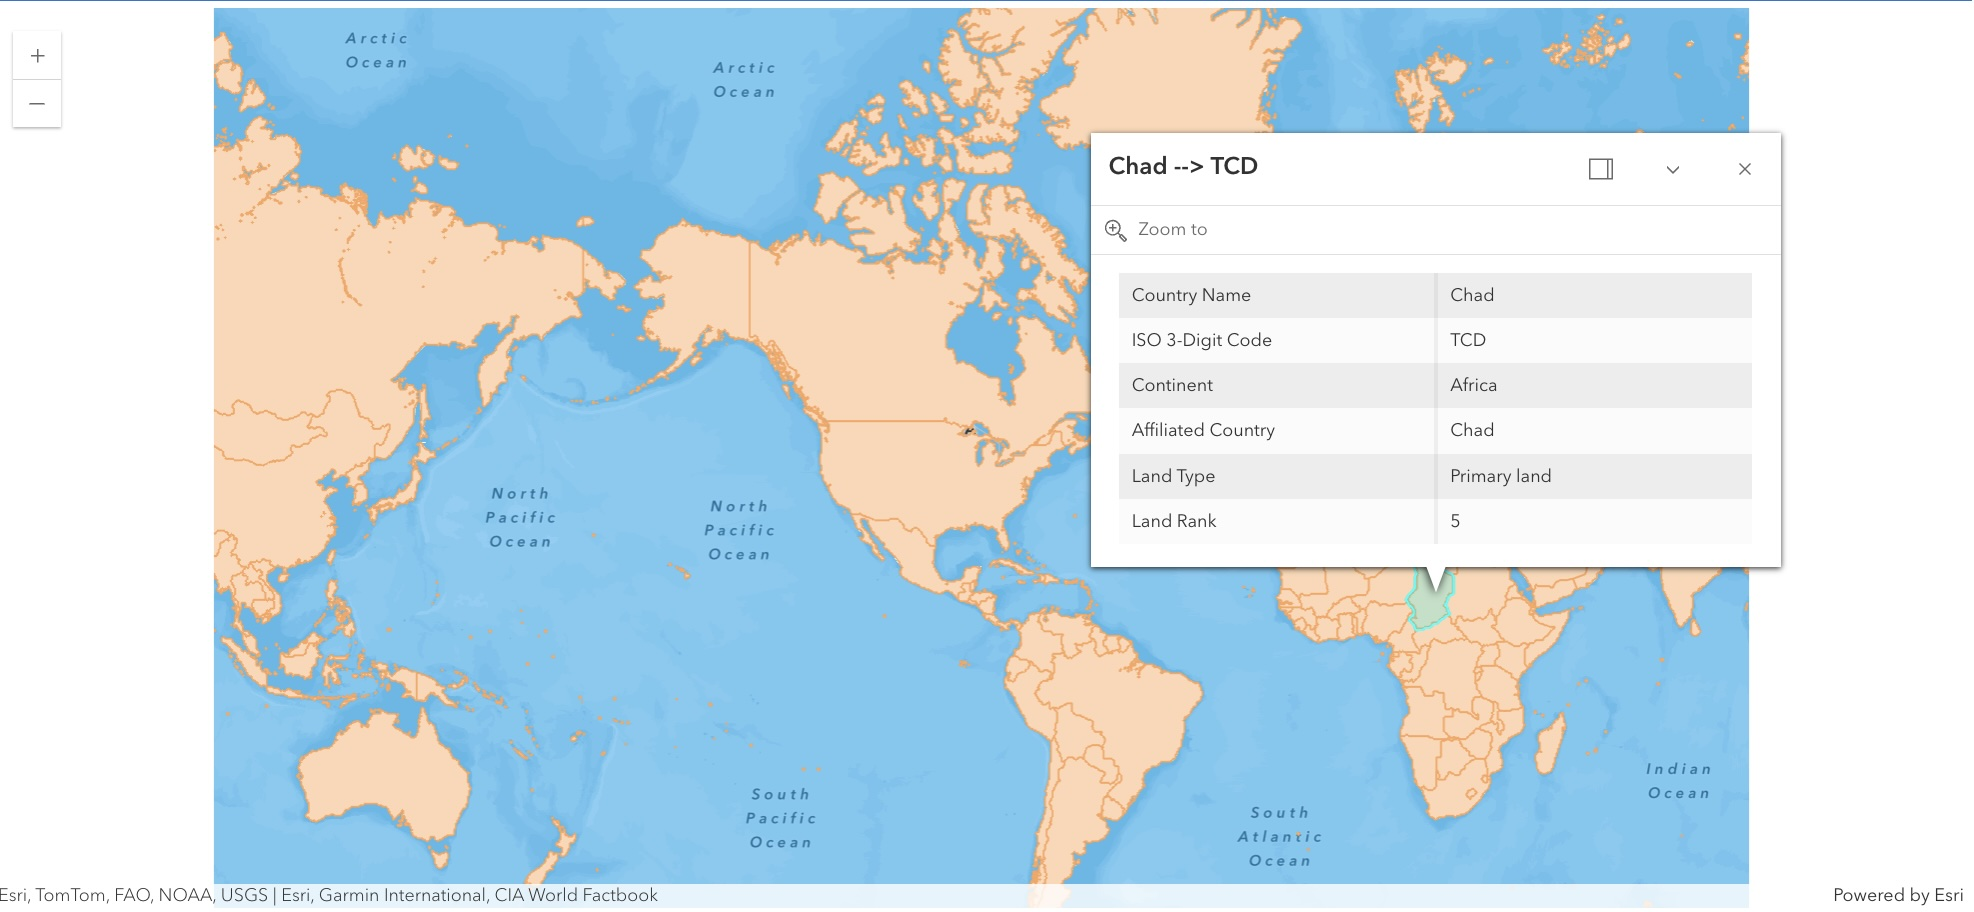

In [65]:
m

## Configure Pop-up

Now let's configure a pop-up for a layer added to a new map widget.

### Add a layer to a map

In [5]:
# Let's get a layer about current college football stadiums in the United States
feature_layer = gis.content.get("70173904c6de4a5aa6d4e24533efdd25").layers[0]
feature_layer

<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/fcs_stadium_locations/FeatureServer/0">

In [6]:
m2 = Map()
m2.content.add(feature_layer)
m2.content.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/fcs_stadium_locations/FeatureServer/0">]


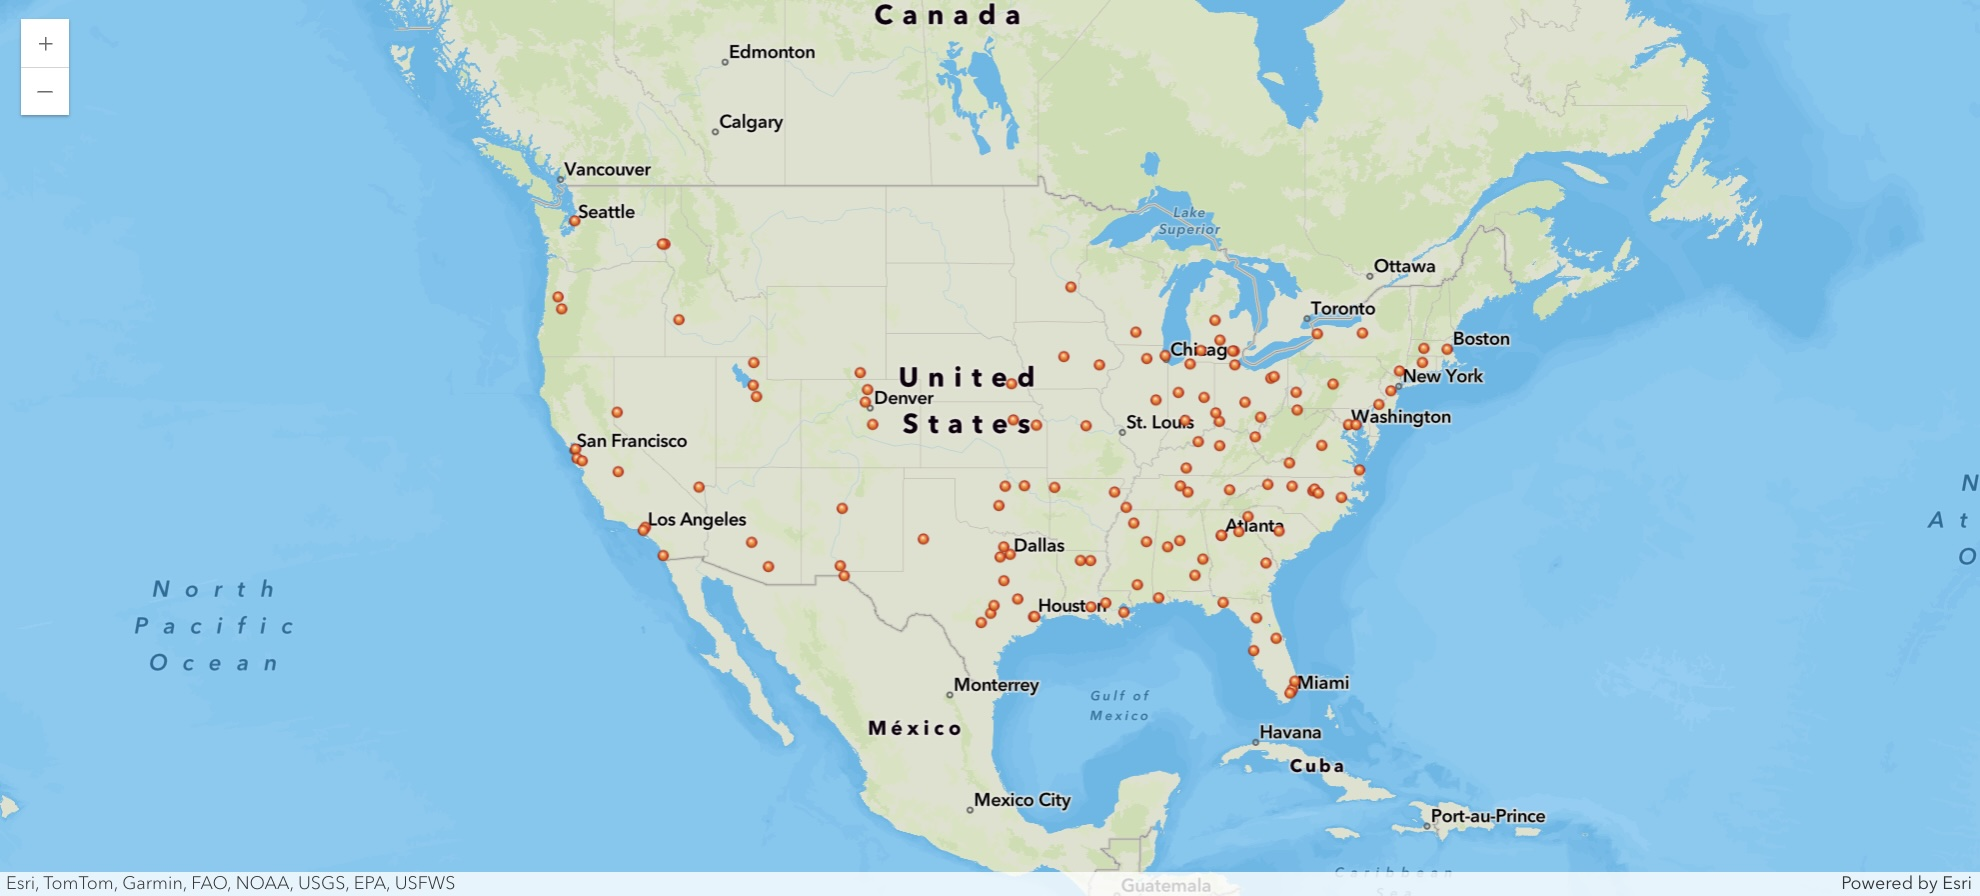

In [11]:
m2

In [8]:
m2.zoom_to_layer(feature_layer)

In [9]:
m2.center = [38, -98]

In [10]:
m2.zoom = 3

### Configure Popup: The _title_

Currently, if you click on a feature in the map, no pop-up appears because the layer has not been configured for them. We can verify this by assigning a variable to the layer's `PopupManager` and querying the `disable_popup` property:

In [9]:
pop_mgr = m2.content.popup(0)
pop_mgr

PopupManager for: fcs_stadium_locations

In [10]:
pop_mgr.disable_popup

True

The value of `True` means the pop-up is disabled. Now we need to set that property to `False` to enable the pop-up. After enabling, we then need to initialize the pop-up by calling the [`edit()`](/python/api-reference/arcgis.map.toc.html#arcgis.map.popups.PopupManager.edit) method to initialize the pop-up. We can then configure a _title_ and a list of [FieldInfo](/python/api-reference/arcgis.map.toc.html#fieldinfo) objects to to configure our attribute display in the pop-up: 

In [11]:
pop_mgr.disable_popup = False

In [12]:
pop_mgr.edit(
    title="US College Football Stadiums"
)

True

In [13]:
pop_mgr.title

'US College Football Stadiums'

Clcking on a feature now shows a pop-up with only a _title_ configured:

In [67]:
m2

Map(center=[-97.99999999999834, 37.999999999999346], extent={'spatialReference': {'latestWkid': 3857, 'wkid': …

### Configure Pop-up: The _FieldsInfo_

Let's use the _edit()_ method to configure the attribute field display as well. First, append a ? mark to the method and run the cell to show the docstring:

In [15]:
pop_mgr.edit?

Signature:
pop_mgr.edit(
    title: 'str | None' = None,
    description: 'str | None' = None,
    expression_infos: 'list[PopupExpressionInfo] | None' = None,
    field_infos: 'list[FieldInfo] | None' = None,
    layer_options: 'LayerOptions | None' = None,
    media_infos: 'list[MediaInfo] | None' = None,
    popup_elements: 'list[PopupElementAttachments | PopupElementExpression | PopupElementFields | PopupElementMedia | PopupElementRelationship | PopupElementText] | None' = None,
    show_attachments: 'bool | None' = None,
) -> 'bool'
Docstring:
Edit the properties of the popup. If no popup info exists then it will create a popup for the layer.
To remove any existing items from the popup, pass in an empty instance of the parameter. For example to
remove the title, pass an empty string or to remove the field_infos pass an empty list. If the parameter
is set to None then nothing will change for that parameter.

=====================       ==============================================

We can see that the _fields_info_ argument needs to be a list of [FieldInfo]() objects. We can use the _feature_layer_ properties to get a list of the _fields_, and then iterate over it to populate a list and create a list of _FieldInfo_ objects:

In [16]:
from arcgis.map.popups import FieldInfo

In [17]:
flds_list = feature_layer.properties.fields
flds_list

[{
   "name": "longitude",
   "type": "esriFieldTypeDouble",
   "actualType": "float",
   "alias": "longitude",
   "sqlType": "sqlTypeFloat",
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "latitude",
   "type": "esriFieldTypeDouble",
   "actualType": "float",
   "alias": "latitude",
   "sqlType": "sqlTypeFloat",
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "school",
   "type": "esriFieldTypeString",
   "actualType": "nvarchar",
   "alias": "school",
   "sqlType": "sqlTypeNVarchar",
   "length": 4000,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "ObjectId",
   "type": "esriFieldTypeOID",
   "actualType": "int",
   "alias": "ObjectId",
   "sqlType": "sqlTypeInteger",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 }]

In [18]:
FieldInfo?

Init signature:
FieldInfo(
    *,
    fieldName: Optional[str] = None,
    format: Optional[arcgis.map.popups.Format] = None,
    isEditable: Optional[bool] = True,
    label: Optional[str] = None,
    statisticType: Optional[arcgis.map.popups.StatisticType] = None,
    stringFieldOption: Optional[arcgis.map.popups.StringFieldOption] = None,
    tooltip: Optional[str] = None,
    visible: Optional[bool] = None,
) -> None
Docstring:      Defines how a field in the dataset participates (or does not participate) in a popup window.
Init docstring:
Create a new model by parsing and validating input data from keyword arguments.

Raises [`ValidationError`][pydantic_core.ValidationError] if the input data cannot be
validated to form a valid model.

`self` is explicitly positional-only to allow `self` as a field name.
File:           ~/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/arcgis/map/popups.py
Type:           ModelMetaclass
Subclasses:     

We can see that when creating new _FieldInfo_ objects, the _format_ argument can be an instance of the [Format]() dataclass. So let's import that class to use it to format the number fields in our popup

In [19]:
from arcgis.map.popups import Format

In [20]:
Format?

Init signature:
Format(
    *,
    dateFormat: Optional[arcgis.map.popups.DateFormat] = None,
    digitSeparator: Optional[bool] = None,
    places: Optional[int] = None,
) -> None
Docstring:     
The format object can be used with numerical or date fields to provide
more detail about how values should be formatted for display.
Init docstring:
Create a new model by parsing and validating input data from keyword arguments.

Raises [`ValidationError`][pydantic_core.ValidationError] if the input data cannot be
validated to form a valid model.

`self` is explicitly positional-only to allow `self` as a field name.
File:           ~/opt/anaconda3/envs/geosaurus_dev_env/lib/python3.11/site-packages/arcgis/map/popups.py
Type:           ModelMetaclass
Subclasses:     

We'll set up a _Format_ object for decimal numbers to be 2 digits after the decimal:

In [22]:
dec_format = Format(
    places=2
)

Let's loop over the feature layer's fields and then create a new list of _FieldInfo_ objects:

In [25]:
finfo_list = []
for fld in feature_layer.properties.fields:
    if not fld["name"] == "ObjectId":
        if "Double" in fld["type"]:
            new_finfo = FieldInfo(
                fieldName=fld["name"],
                format=dec_format,
                label=fld["name"].capitalize(),
                visible=True
            )
        else:
            new_finfo = FieldInfo(
                fieldName=fld["name"],
                label=fld["name"].capitalize(),
                visible=True
            )        
    else:
        new_finfo = FieldInfo(
            fieldName=fld["name"],
            label=fld["name"] + "_api",
            visible=False
        )
    finfo_list.append(new_finfo)


In [26]:
finfo_list

[FieldInfo(field_name='longitude', format=Format(date_format=None, digit_separator=None, places=2), is_editable=True, label='Longitude', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='latitude', format=Format(date_format=None, digit_separator=None, places=2), is_editable=True, label='Latitude', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='school', format=None, is_editable=True, label='School', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='ObjectId', format=None, is_editable=True, label='ObjectId_api', statistic_type=None, string_field_option=None, tooltip=None, visible=False)]

Let's swap the position of the _school_ field with the _longitude_field:

In [27]:
finfo_list[0], finfo_list[2] = finfo_list[2], finfo_list[0]

In [28]:
finfo_list

[FieldInfo(field_name='school', format=None, is_editable=True, label='School', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='latitude', format=Format(date_format=None, digit_separator=None, places=2), is_editable=True, label='Latitude', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='longitude', format=Format(date_format=None, digit_separator=None, places=2), is_editable=True, label='Longitude', statistic_type=None, string_field_option=None, tooltip=None, visible=True),
 FieldInfo(field_name='ObjectId', format=None, is_editable=True, label='ObjectId_api', statistic_type=None, string_field_option=None, tooltip=None, visible=False)]

Now we'll edit our pop-up with this new list:

In [29]:
pop_mgr.edit(
    field_infos=finfo_list
)

True


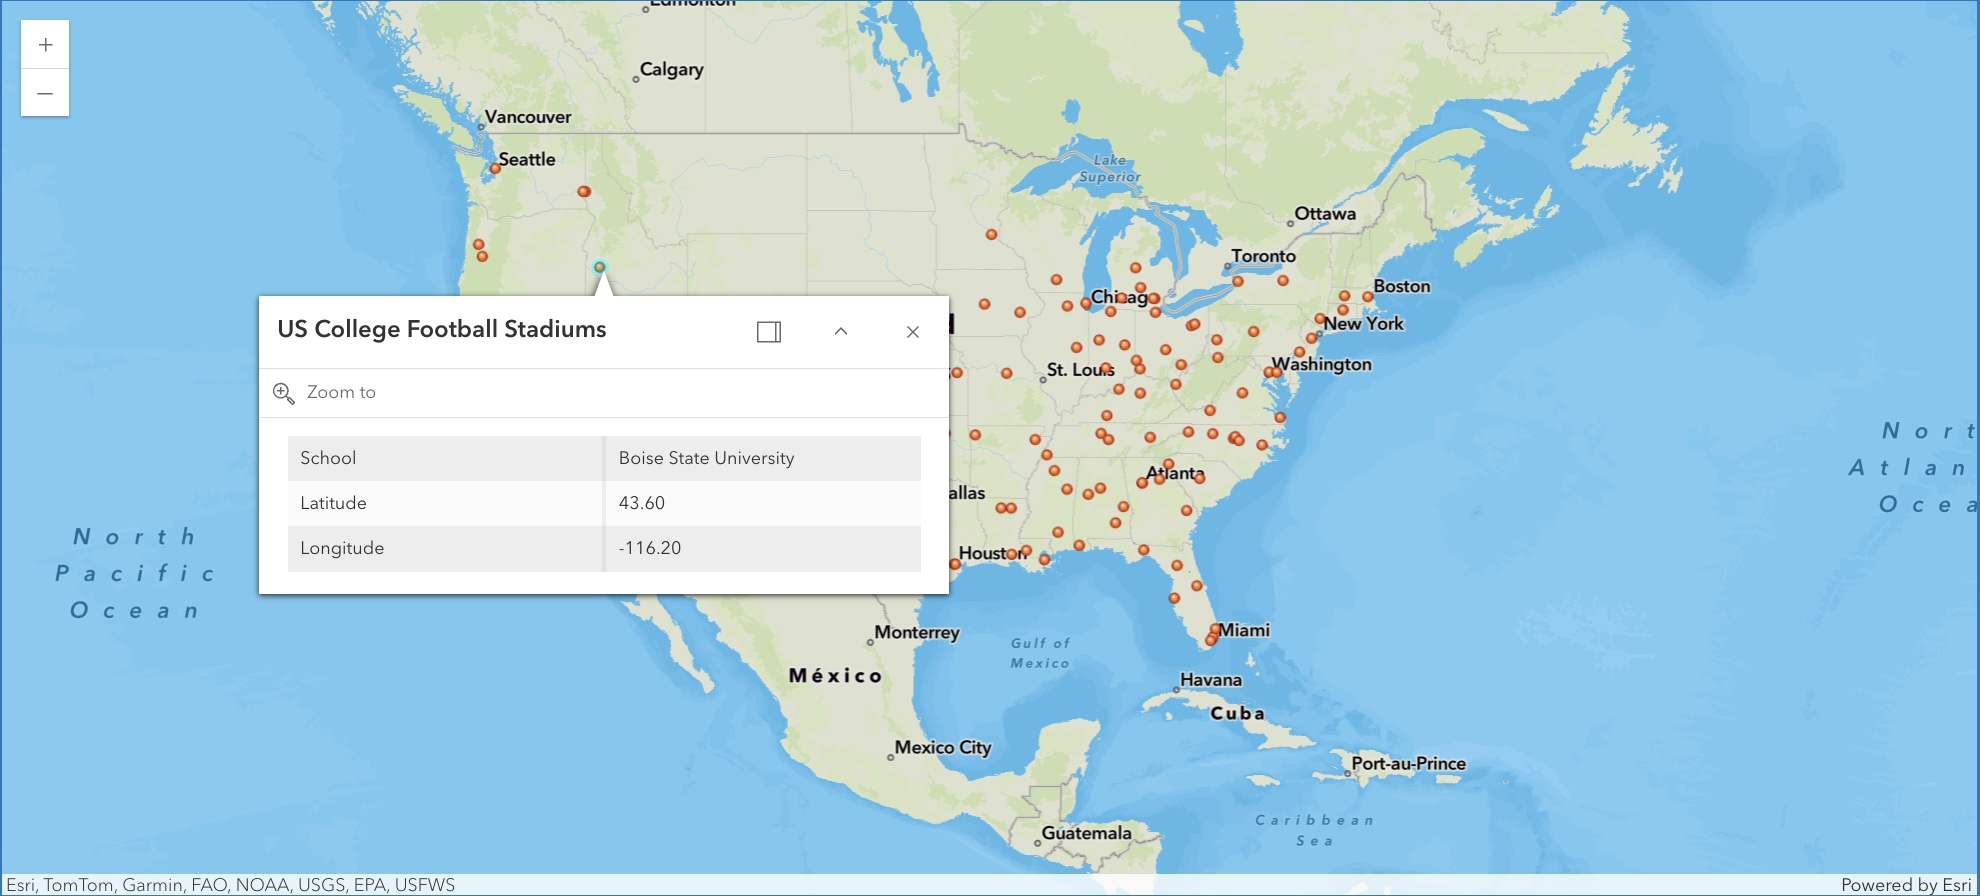

In [31]:
m2

### Save the map to save the pop-up

Now let's save the map so our pop-up changes are preserved in a new Web map.

In [32]:
saved_map_item = m2.save(
    item_properties={
        "title":"FCS Stadiums",
        "tags":"popup_testing,Python API",
        "snippet":"Web Map saved in API to test enabling popups"
    },
    folder="stadiums"
)

In [33]:
saved_map_item

<Item title:"FCS Stadiums" type:Web Map owner:arcgis_python>

In [35]:
saved_map_item.get_data()["operationalLayers"][0]["popupInfo"]

{'fieldInfos': [{'fieldName': 'school',
   'isEditable': True,
   'label': 'School',
   'visible': True},
  {'fieldName': 'latitude',
   'format': {'places': 2},
   'isEditable': True,
   'label': 'Latitude',
   'visible': True},
  {'fieldName': 'longitude',
   'format': {'places': 2},
   'isEditable': True,
   'label': 'Longitude',
   'visible': True},
  {'fieldName': 'ObjectId',
   'isEditable': True,
   'label': 'ObjectId_api',
   'visible': False}],
 'showLastEditInfo': True,
 'title': 'US College Football Stadiums'}